In [0]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [16]:
data = load_iris()
df = pd.DataFrame(data= np.c_[data['data'], data['target']], columns= data['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


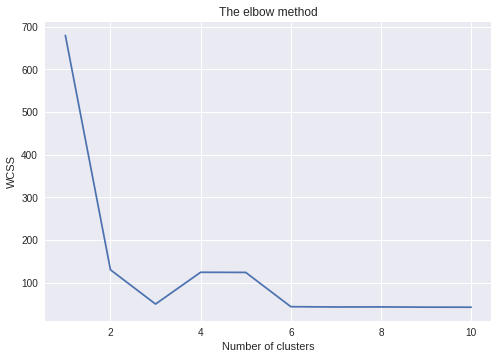

In [18]:
x = df.iloc[:, [1, 2, 3, 4]].values
wcss = []
for i in range(1, 11):
    initlize = []
    for j in range(i):
      initlize.append(x[j])
    initlize = np.asarray(initlize)
    kmeans = KMeans(n_clusters=i, init=initlize, max_iter=100, n_init=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [0]:
#Applying kmeans to the dataset / Creating the kmeans classifier
initlize = []
for j in range(4):
  initlize.append(x[j])
initlize = np.asarray(initlize)
kmeans = KMeans(n_clusters=4, init=initlize, max_iter=100, n_init=1)
y_kmeans = kmeans.fit_predict(x)

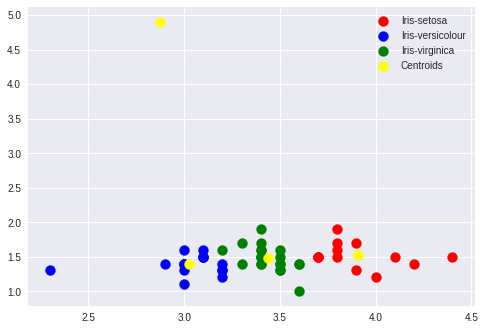

In [22]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [25]:
print('Initial Centroids are')
print(initlize)

Initial Centroids are
[[3.5 1.4 0.2 0. ]
 [3.  1.4 0.2 0. ]
 [3.2 1.3 0.2 0. ]
 [3.1 1.5 0.2 0. ]]


In [26]:
print('Final Centroids are')
print(kmeans.cluster_centers_)

Final Centroids are
[[3.90769231 1.52307692 0.28461538 0.        ]
 [3.025      1.3875     0.19375    0.        ]
 [3.43809524 1.48095238 0.26190476 0.        ]
 [2.872      4.906      1.676      1.5       ]]
